In [1]:
## Import Dependencies
from pprint import pprint
import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
## Create the Dataframe and list the column names

df = pd.read_csv('../Resources/CountyHealthData.csv')
list(df.columns)

['Year',
 'StateAbbr',
 'StateDesc',
 'LocationName',
 'DataSource',
 'Category',
 'Measure',
 'Data_Value_Unit',
 'Data_Value_Type',
 'Data_Value',
 'Data_Value_Footnote_Symbol',
 'Data_Value_Footnote',
 'Low_Confidence_Limit',
 'High_Confidence_Limit',
 'TotalPopulation',
 'LocationID',
 'CategoryID',
 'MeasureId',
 'DataValueTypeID',
 'Short_Question_Text',
 'Geolocation',
 'States',
 'Counties']

In [3]:
list(df['Short_Question_Text'].unique())

['High Blood Pressure',
 'Physical Inactivity',
 'Binge Drinking',
 'Arthritis',
 'Annual Checkup',
 'Chronic Kidney Disease',
 'Cancer (except skin)',
 'Mental Health',
 'Cholesterol Screening',
 'Cervical Cancer Screening',
 'General Health',
 'Core preventive services for older men',
 'Stroke',
 'COPD',
 'Taking BP Medication',
 'Current Smoking',
 'Physical Health',
 'Dental Visit',
 'Sleep <7 hours',
 'Current Asthma',
 'Obesity',
 'Depression',
 'Colorectal Cancer Screening',
 'Diabetes',
 'All Teeth Lost',
 'Mammography',
 'Core preventive services for older women',
 'Health Insurance',
 'Coronary Heart Disease',
 'High Cholesterol']

In [4]:
new_df = df.loc[df['Short_Question_Text'].isin(
                        ['High Blood Pressure', 
                         'Physical Inactivity'
                         'Binge Drinking',
                         'Mental Health',
                         'Current Smoking',
                         'Sleep <7 hours',
                         'Obesity',
                         
                         'High Cholesterol',
                         'Depression'])]

new_df = new_df.loc[new_df['Year'] == 2019]
new_df

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation,States,Counties
0,2019,WY,Wyoming,Crook,BRFSS,Health Outcomes,High blood pressure among adults aged >=18 years,%,Age-adjusted prevalence,27.0,...,28.2,7593,56011,HLTHOUT,BPHIGH,AgeAdjPrv,High Blood Pressure,POINT (-104.5672975 44.5892657),14.0,3083.0
24,2019,WY,Wyoming,Carbon,BRFSS,Health Outcomes,High blood pressure among adults aged >=18 years,%,Age-adjusted prevalence,29.6,...,30.6,14711,56007,HLTHOUT,BPHIGH,AgeAdjPrv,High Blood Pressure,POINT (-106.9331526 41.7035904),14.0,3081.0
28,2019,WY,Wyoming,Platte,BRFSS,Health Outcomes,High blood pressure among adults aged >=18 years,%,Crude prevalence,36.4,...,37.7,8578,56031,HLTHOUT,BPHIGH,CrdPrv,High Blood Pressure,POINT (-104.9539626 42.1315927),14.0,892.0
76,2019,WY,Wyoming,Niobrara,BRFSS,Health Outcomes,High cholesterol among adults aged >=18 years ...,%,Crude prevalence,31.0,...,32.3,2275,56027,HLTHOUT,HIGHCHOL,CrdPrv,High Cholesterol,POINT (-104.4683727 43.062159),14.0,3121.0
78,2019,WY,Wyoming,Weston,BRFSS,Health Outcomes,High cholesterol among adults aged >=18 years ...,%,Age-adjusted prevalence,25.7,...,26.6,6743,56045,HLTHOUT,HIGHCHOL,AgeAdjPrv,High Cholesterol,POINT (-104.5700202 43.8462133),14.0,894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188352,2019,AL,Alabama,Monroe,BRFSS,Health Outcomes,High cholesterol among adults aged >=18 years ...,%,Crude prevalence,38.8,...,39.7,20459,1099,HLTHOUT,HIGHCHOL,CrdPrv,High Cholesterol,POINT (-87.3832656 31.5803324),29.0,1592.0
188356,2019,AL,Alabama,Russell,BRFSS,Health Outcomes,High cholesterol among adults aged >=18 years ...,%,Crude prevalence,34.7,...,35.5,58237,1113,HLTHOUT,HIGHCHOL,CrdPrv,High Cholesterol,POINT (-85.1869798 32.2898113),29.0,1634.0
188359,2019,AL,Alabama,Mobile,BRFSS,Health Outcomes,High blood pressure among adults aged >=18 years,%,Age-adjusted prevalence,39.5,...,40.5,412716,1097,HLTHOUT,BPHIGH,AgeAdjPrv,High Blood Pressure,POINT (-88.1965682 30.6845725),29.0,1591.0
188382,2019,AL,Alabama,Bibb,BRFSS,Health Outcomes,High blood pressure among adults aged >=18 years,%,Age-adjusted prevalence,41.3,...,42.4,22136,1007,HLTHOUT,BPHIGH,AgeAdjPrv,High Blood Pressure,POINT (-87.1271475 33.0158929),29.0,92.0


In [5]:
## Clean the DataFrame and only show the columns we need

new_df = new_df[['Year',
 'StateAbbr',
 'LocationName',
 'Data_Value_Type',
 'Data_Value',
 'TotalPopulation',
 'CategoryID',
 'MeasureId',
 'DataValueTypeID',
 'Short_Question_Text',
 'Geolocation']]
new_df.dropna()

,Year,StateAbbr,LocationName,Data_Value_Type,Data_Value,TotalPopulation,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
0,2019,WY,Crook,Age-adjusted prevalence,27.0,7593,HLTHOUT,BPHIGH,AgeAdjPrv,High Blood Pressure,POINT (-104.5672975 44.5892657)
24,2019,WY,Carbon,Age-adjusted prevalence,29.6,14711,HLTHOUT,BPHIGH,AgeAdjPrv,High Blood Pressure,POINT (-106.9331526 41.7035904)
28,2019,WY,Platte,Crude prevalence,36.4,8578,HLTHOUT,BPHIGH,CrdPrv,High Blood Pressure,POINT (-104.9539626 42.1315927)
76,2019,WY,Niobrara,Crude prevalence,31.0,2275,HLTHOUT,HIGHCHOL,CrdPrv,High Cholesterol,POINT (-104.4683727 43.062159)
78,2019,WY,Weston,Age-adjusted prevalence,25.7,6743,HLTHOUT,HIGHCHOL,AgeAdjPrv,High Cholesterol,POINT (-104.5700202 43.8462133)
...,...,...,...,...,...,...,...,...,...,...,...
188352,2019,AL,Monroe,Crude prevalence,38.8,20459,HLTHOUT,HIGHCHOL,CrdPrv,High Cholesterol,POINT (-87.3832656 31.5803324)
188356,2019,AL,Russell,Crude prevalence,34.7,58237,HLTHOUT,HIGHCHOL,CrdPrv,High Cholesterol,POINT (-85.1869798 32.2898113)
188359,2019,AL,Mobile,Age-adjusted prevalence,39.5,412716,HLTHOUT,BPHIGH,AgeAdjPrv,High Blood Pressure,POINT (-88.1965682 30.6845725)
188382,2019,AL,Bibb,Age-adjusted prevalence,41.3,22136,HLTHOUT,BPHIGH,AgeAdjPrv,High Blood Pressure,POINT (-87.1271475 33.0158929)


In [6]:
list(new_df['Short_Question_Text'].unique())

['High Blood Pressure', 'High Cholesterol']

In [7]:
## Fix the format of the Geolocation column

## Create an empty list
lats = []
lons = []

## Iterate through the rows
for i in new_df['Geolocation']:
    ## Set each item to a string
    s = str(i)
    # get lon-lat from "POINT (lon lat)"
    loc = s[7:-1]
    ## Turn the returned string into a list
    l = loc.split(' ')
    ## Reverse the list
    
    try:
        lats.append(l[1])
        
    except:
        lats.append('')
        
    try:
        lons.append(l[0])
        
    except:
        lats.append('')
           
        
        
        
    ## Use a list comprehension to turn the string values in the list back in to floats
new_df['Lat'] = lats
new_df['Lon'] = lons



<ipython-input-7-0e07ecb30466>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Lat'] = lats
<ipython-input-7-0e07ecb30466>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Lon'] = lons


In [8]:
gs_df = pd.read_excel('../Resources/US-data-only-green-area-per_capita-square-meters-per-capita.xlsx')
gs_df = gs_df[['city', 'state', 'county','average_greenspace']]
gs_df

,city,state,county,average_greenspace
0,Philadelphia,PA,Philadelphia,1516.564566
1,Denver,CO,Denver,12.665109
2,Portland,OR,Multnomah,964.247742
3,Baltimore,MD,Baltimore,1939.655916
4,Cincinnati,OH,Hamilton,6291.645367
...,...,...,...,...
61,Des Moines,IA,Polk,3023.467223
62,Omaha,NE,Douglas,638.824150
63,Akron,OH,Summit,696.782397
64,Salt Lake City,UT,Salt Lake,630.237928


In [9]:
gs_df['county'] = gs_df['county'].str.strip()
gs_df['city'] = gs_df['city'].str.strip()
gs_df['state'] = gs_df['state'].str.strip()

In [10]:
## Show the DataFrame again with the new location values
final_df = new_df.drop(columns = ['CategoryID', 'MeasureId', 'Geolocation'])
final_df

,Year,StateAbbr,LocationName,Data_Value_Type,Data_Value,TotalPopulation,DataValueTypeID,Short_Question_Text,Lat,Lon
0,2019,WY,Crook,Age-adjusted prevalence,27.0,7593,AgeAdjPrv,High Blood Pressure,44.5892657,-104.5672975
24,2019,WY,Carbon,Age-adjusted prevalence,29.6,14711,AgeAdjPrv,High Blood Pressure,41.7035904,-106.9331526
28,2019,WY,Platte,Crude prevalence,36.4,8578,CrdPrv,High Blood Pressure,42.1315927,-104.9539626
76,2019,WY,Niobrara,Crude prevalence,31.0,2275,CrdPrv,High Cholesterol,43.062159,-104.4683727
78,2019,WY,Weston,Age-adjusted prevalence,25.7,6743,AgeAdjPrv,High Cholesterol,43.8462133,-104.5700202
...,...,...,...,...,...,...,...,...,...,...
188352,2019,AL,Monroe,Crude prevalence,38.8,20459,CrdPrv,High Cholesterol,31.5803324,-87.3832656
188356,2019,AL,Russell,Crude prevalence,34.7,58237,CrdPrv,High Cholesterol,32.2898113,-85.1869798
188359,2019,AL,Mobile,Age-adjusted prevalence,39.5,412716,AgeAdjPrv,High Blood Pressure,30.6845725,-88.1965682
188382,2019,AL,Bibb,Age-adjusted prevalence,41.3,22136,AgeAdjPrv,High Blood Pressure,33.0158929,-87.1271475


In [11]:
## Changing column types
final_df['Lat'] = pd.to_numeric(final_df['Lat'])
final_df['Lon'] = pd.to_numeric(final_df['Lon'])

In [12]:
final_df['LocationName'] = final_df['LocationName'].str.strip()
final_df['StateAbbr'] = final_df['StateAbbr'].str.strip()
test4 = final_df.loc[final_df['LocationName'] == 'Jefferson']
test4

,Year,StateAbbr,LocationName,Data_Value_Type,Data_Value,TotalPopulation,DataValueTypeID,Short_Question_Text,Lat,Lon
3206,2019,WI,Jefferson,Age-adjusted prevalence,27.9,85038,AgeAdjPrv,High Cholesterol,43.013804,-88.773985
3928,2019,WI,Jefferson,Crude prevalence,30.2,85038,CrdPrv,High Blood Pressure,43.013804,-88.773985
5025,2019,WI,Jefferson,Crude prevalence,33.3,85038,CrdPrv,High Cholesterol,43.013804,-88.773985
5110,2019,WI,Jefferson,Age-adjusted prevalence,26.9,85038,AgeAdjPrv,High Blood Pressure,43.013804,-88.773985
6614,2019,WV,Jefferson,Crude prevalence,37.4,57486,CrdPrv,High Blood Pressure,39.307398,-77.863220
...,...,...,...,...,...,...,...,...,...,...
181715,2019,AR,Jefferson,Age-adjusted prevalence,44.1,65377,AgeAdjPrv,High Blood Pressure,34.277239,-91.929673
185293,2019,AL,Jefferson,Crude prevalence,40.1,655342,CrdPrv,High Blood Pressure,33.553444,-86.896536
185797,2019,AL,Jefferson,Age-adjusted prevalence,28.6,655342,AgeAdjPrv,High Cholesterol,33.553444,-86.896536
186251,2019,AL,Jefferson,Crude prevalence,31.9,655342,CrdPrv,High Cholesterol,33.553444,-86.896536


In [13]:
final_df = pd.merge(final_df, gs_df, how='inner', left_on=['LocationName', 'StateAbbr'], right_on=['county', 'state'])
final_df

,Year,StateAbbr,LocationName,Data_Value_Type,Data_Value,TotalPopulation,DataValueTypeID,Short_Question_Text,Lat,Lon,city,state,county,average_greenspace
0,2019,WI,Milwaukee,Age-adjusted prevalence,31.4,945016,AgeAdjPrv,High Blood Pressure,42.912643,-87.862312,Milwaukee,WI,Milwaukee,2475.873538
1,2019,WI,Milwaukee,Crude prevalence,31.5,945016,CrdPrv,High Blood Pressure,42.912643,-87.862312,Milwaukee,WI,Milwaukee,2475.873538
2,2019,WI,Milwaukee,Age-adjusted prevalence,29.9,945016,AgeAdjPrv,High Cholesterol,42.912643,-87.862312,Milwaukee,WI,Milwaukee,2475.873538
3,2019,WI,Milwaukee,Crude prevalence,32.3,945016,CrdPrv,High Cholesterol,42.912643,-87.862312,Milwaukee,WI,Milwaukee,2475.873538
4,2019,WI,Dane,Crude prevalence,26.2,552536,CrdPrv,High Blood Pressure,43.067468,-89.417852,Madison,WI,Dane,2698.259680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2019,AZ,Maricopa,Age-adjusted prevalence,29.3,4579081,AgeAdjPrv,High Blood Pressure,33.345176,-112.498930,Phoenix,AZ,Maricopa,38.427155
260,2019,AL,Jefferson,Crude prevalence,40.1,655342,CrdPrv,High Blood Pressure,33.553444,-86.896536,Birmingham,AL,Jefferson,1088.105755
261,2019,AL,Jefferson,Age-adjusted prevalence,28.6,655342,AgeAdjPrv,High Cholesterol,33.553444,-86.896536,Birmingham,AL,Jefferson,1088.105755
262,2019,AL,Jefferson,Crude prevalence,31.9,655342,CrdPrv,High Cholesterol,33.553444,-86.896536,Birmingham,AL,Jefferson,1088.105755


In [14]:
final_df.replace("Miami-Dade", "Miami Dade", inplace=True)
test4 = final_df.loc[final_df['county'] == 'Miami Dade']
test4

,Year,StateAbbr,LocationName,Data_Value_Type,Data_Value,TotalPopulation,DataValueTypeID,Short_Question_Text,Lat,Lon,city,state,county,average_greenspace
204,2019,FL,Miami Dade,Crude prevalence,31.3,2707303,CrdPrv,High Cholesterol,25.616008,-80.503749,Miami,FL,Miami Dade,818.067688
205,2019,FL,Miami Dade,Age-adjusted prevalence,28.9,2707303,AgeAdjPrv,High Blood Pressure,25.616008,-80.503749,Miami,FL,Miami Dade,818.067688
206,2019,FL,Miami Dade,Crude prevalence,31.9,2707303,CrdPrv,High Blood Pressure,25.616008,-80.503749,Miami,FL,Miami Dade,818.067688
207,2019,FL,Miami Dade,Age-adjusted prevalence,27.2,2707303,AgeAdjPrv,High Cholesterol,25.616008,-80.503749,Miami,FL,Miami Dade,818.067688


In [15]:
## Export it to a file

final_df.to_csv('../Resources/CleanedHealthCountyData.csv')

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 264 non-null    int64  
 1   StateAbbr            264 non-null    object 
 2   LocationName         264 non-null    object 
 3   Data_Value_Type      264 non-null    object 
 4   Data_Value           264 non-null    float64
 5   TotalPopulation      264 non-null    int64  
 6   DataValueTypeID      264 non-null    object 
 7   Short_Question_Text  264 non-null    object 
 8   Lat                  264 non-null    float64
 9   Lon                  264 non-null    float64
 10  city                 264 non-null    object 
 11  state                264 non-null    object 
 12  county               264 non-null    object 
 13  average_greenspace   264 non-null    float64
dtypes: float64(4), int64(2), object(8)
memory usage: 30.9+ KB


In [17]:
group = final_df.groupby(['LocationName', 'StateAbbr'])

data_list = []
for row in group:
    empty_dict = {

    }
    county = row[0][0]
    empty_dict['county'] = county
        
    state = row[0][1]
    empty_dict['state'] = state
        
    data = row[1]
    parameters = [x for x in data['Short_Question_Text']]
    data_types = [x for x in data['DataValueTypeID']]
    
    data_values = [x for x in data['Data_Value']]
    
    population = data['TotalPopulation'].head(1)
    empty_dict['population'] = int(population.values[0])
    
    city = data['city'].head(1).values[0]
    empty_dict['city'] = city
    
    gpc = data['average_greenspace'].head(1).values[0]
    empty_dict['greenspace_per_capita'] = round(gpc,2)
    
    
    lat = data['Lat'].head(1)
    
    lon = data['Lon'].head(1)
    empty_dict['location'] = [float(lat.values[0]),float(lon.values[0])]

    ##print(county, state, parameters, data_types, measurements, population, lat, lon)
    measurements = {}
    for i in range(4):
        m = parameters[i].replace(' ','')
        dt = data_types[i]
        m=m+dt
        measurements[m] = data_values[i]
        empty_dict['measurements'] = measurements

    data_list.append(empty_dict)
data_list

[{'county': 'Albany',
  'state': 'NY',
  'population': 303654,
  'city': 'Albany',
  'greenspace_per_capita': 1601.78,
  'location': [42.5882401, -73.9740095],
  'measurements': {'HighBloodPressureAgeAdjPrv': 26.1,
   'HighBloodPressureCrdPrv': 27.3,
   'HighCholesterolAgeAdjPrv': 28.4,
   'HighCholesterolCrdPrv': 30.9}},
 {'county': 'Allegheny',
  'state': 'PA',
  'population': 1211358,
  'city': 'Pittsburgh',
  'greenspace_per_capita': 754.31,
  'location': [40.4697574, -79.9804515],
  'measurements': {'HighCholesterolCrdPrv': 30.6,
   'HighCholesterolAgeAdjPrv': 26.3,
   'HighBloodPressureAgeAdjPrv': 28.5,
   'HighBloodPressureCrdPrv': 31.9}},
 {'county': 'Baltimore',
  'state': 'MD',
  'population': 826017,
  'city': 'Baltimore',
  'greenspace_per_capita': 1939.66,
  'location': [39.4431666, -76.6165693],
  'measurements': {'HighCholesterolCrdPrv': 33.1,
   'HighBloodPressureCrdPrv': 35.5,
   'HighCholesterolAgeAdjPrv': 29.2,
   'HighBloodPressureAgeAdjPrv': 32.4}},
 {'county': 'Be

In [18]:
import json

with open("../Resources/data.json", "w") as outfile:
    json.dump(data_list, outfile)


In [19]:
plots_df = final_df.copy()
plots_df

,Year,StateAbbr,LocationName,Data_Value_Type,Data_Value,TotalPopulation,DataValueTypeID,Short_Question_Text,Lat,Lon,city,state,county,average_greenspace
0,2019,WI,Milwaukee,Age-adjusted prevalence,31.4,945016,AgeAdjPrv,High Blood Pressure,42.912643,-87.862312,Milwaukee,WI,Milwaukee,2475.873538
1,2019,WI,Milwaukee,Crude prevalence,31.5,945016,CrdPrv,High Blood Pressure,42.912643,-87.862312,Milwaukee,WI,Milwaukee,2475.873538
2,2019,WI,Milwaukee,Age-adjusted prevalence,29.9,945016,AgeAdjPrv,High Cholesterol,42.912643,-87.862312,Milwaukee,WI,Milwaukee,2475.873538
3,2019,WI,Milwaukee,Crude prevalence,32.3,945016,CrdPrv,High Cholesterol,42.912643,-87.862312,Milwaukee,WI,Milwaukee,2475.873538
4,2019,WI,Dane,Crude prevalence,26.2,552536,CrdPrv,High Blood Pressure,43.067468,-89.417852,Madison,WI,Dane,2698.259680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2019,AZ,Maricopa,Age-adjusted prevalence,29.3,4579081,AgeAdjPrv,High Blood Pressure,33.345176,-112.498930,Phoenix,AZ,Maricopa,38.427155
260,2019,AL,Jefferson,Crude prevalence,40.1,655342,CrdPrv,High Blood Pressure,33.553444,-86.896536,Birmingham,AL,Jefferson,1088.105755
261,2019,AL,Jefferson,Age-adjusted prevalence,28.6,655342,AgeAdjPrv,High Cholesterol,33.553444,-86.896536,Birmingham,AL,Jefferson,1088.105755
262,2019,AL,Jefferson,Crude prevalence,31.9,655342,CrdPrv,High Cholesterol,33.553444,-86.896536,Birmingham,AL,Jefferson,1088.105755


In [20]:
plotsGPC = plots_df[['LocationName','average_greenspace']]
plotsGPCList = plotsGPC.average_greenspace.unique()

In [21]:
bpCrudePlot = plots_df.loc[(plots_df['Data_Value_Type'] == 'Crude prevalence') & (plots_df['Short_Question_Text'] == 'High Blood Pressure'),:]


In [22]:
bpAgePlot = plots_df.loc[(plots_df['Data_Value_Type'] == 'Age-adjusted prevalence') & (plots_df['Short_Question_Text'] == 'High Blood Pressure'),:]


In [23]:
cholesterolCrudePlot = plots_df.loc[(plots_df['Data_Value_Type'] == 'Crude prevalence') & (plots_df['Short_Question_Text'] == 'High Cholesterol'),:]


In [24]:
cholesterolAgePlot = plots_df.loc[(plots_df['Data_Value_Type'] == 'Age-adjusted prevalence') & (plots_df['Short_Question_Text'] == 'High Cholesterol'),:]


The r-value is: 0.11748078568362919


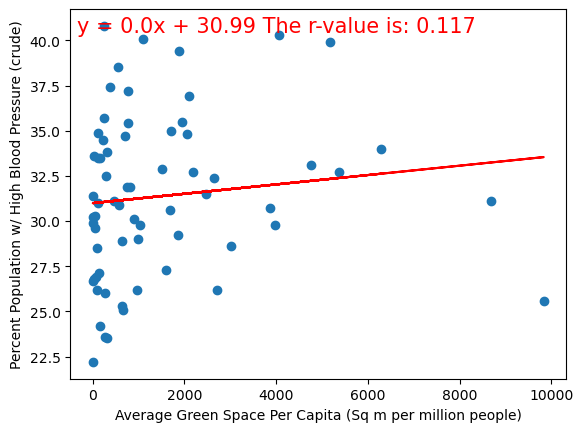

In [39]:
plt.scatter(plotsGPCList, bpCrudePlot['Data_Value'])
plt.xlabel("Average Green Space Per Capita (Sq m per million people)")
plt.ylabel("Percent Population w/ High Blood Pressure (crude)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(plotsGPCList,bpCrudePlot['Data_Value'])
regress_values = plotsGPCList * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + " The r-value is: " + str((round(rvalue,3)))
plt.plot(plotsGPCList,regress_values,"r-")
plt.annotate(line_eq,xy=(0, 1), xytext=(5, -5), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("../Resources/bpCrude.png")
plt.show()

The r-value is: 0.07553644789806985


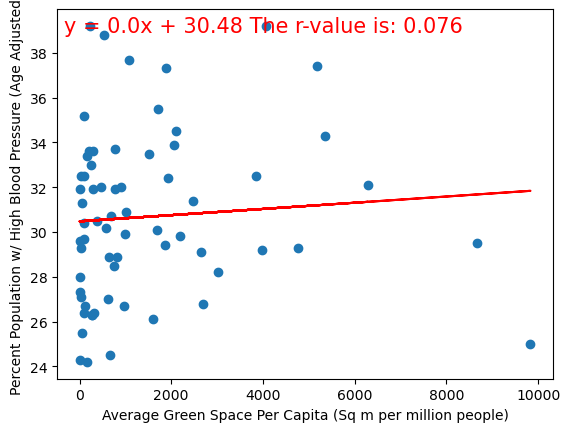

In [40]:
plt.scatter(plotsGPCList, bpAgePlot['Data_Value'])
plt.xlabel("Average Green Space Per Capita (Sq m per million people)")
plt.ylabel("Percent Population w/ High Blood Pressure (Age Adjusted)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(plotsGPCList,bpAgePlot['Data_Value'])
regress_values = plotsGPCList * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + " The r-value is: " + str((round(rvalue,3)))
plt.plot(plotsGPCList,regress_values,"r-")
plt.annotate(line_eq,xy=(0, 1), xytext=(5, -5), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("../Resources/bpAge.png")
plt.show()

The r-value is: 0.08655232298662026


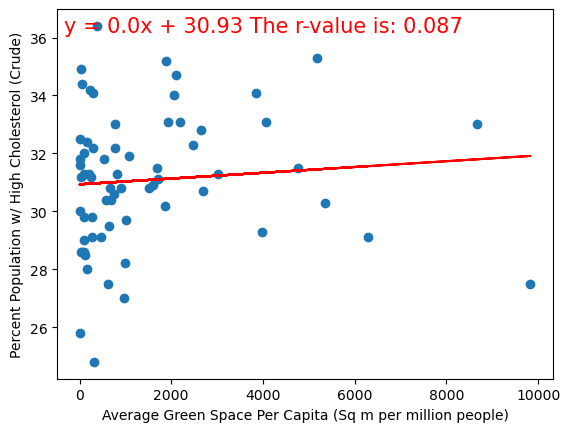

In [41]:
plt.scatter(plotsGPCList, cholesterolCrudePlot['Data_Value'])
plt.xlabel("Average Green Space Per Capita (Sq m per million people)")
plt.ylabel("Percent Population w/ High Cholesterol (Crude)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(plotsGPCList,cholesterolCrudePlot['Data_Value'])
regress_values = plotsGPCList * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + " The r-value is: " + str((round(rvalue,3)))
plt.plot(plotsGPCList,regress_values,"r-")
plt.annotate(line_eq,xy=(0, 1), xytext=(5, -5), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("../Resources/cholesterolCrude.png")
plt.show()

The r-value is: 0.006165196794651982


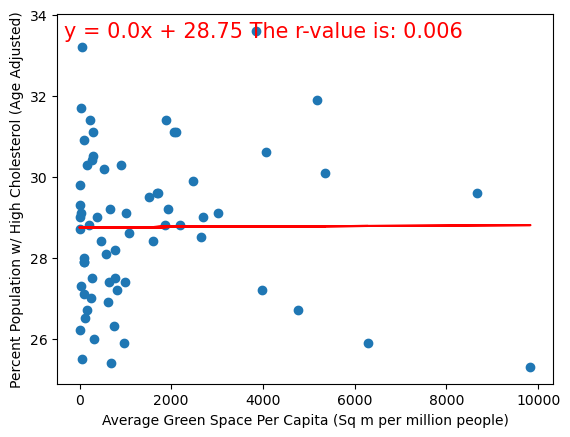

In [42]:
plt.scatter(plotsGPCList, cholesterolAgePlot['Data_Value'])
plt.xlabel("Average Green Space Per Capita (Sq m per million people)")
plt.ylabel("Percent Population w/ High Cholesterol (Age Adjusted)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(plotsGPCList,cholesterolAgePlot['Data_Value'])
regress_values = plotsGPCList * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + " The r-value is: " + str((round(rvalue,3)))
plt.plot(plotsGPCList,regress_values,"r-")
plt.annotate(line_eq,xy=(0, 1), xytext=(5, -5), va='top',
             xycoords='axes fraction', textcoords='offset points',fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.savefig("../Resources/cholesterolAge.png")
plt.show()

In [29]:
group0 = bpCrudePlot['Data_Value']
group1 = bpAgePlot['Data_Value']
group2 = cholesterolCrudePlot['Data_Value']
group3 = cholesterolAgePlot['Data_Value']
stats.f_oneway(group0, group1, group2, group3)

F_onewayResult(statistic=8.54267034827498, pvalue=1.9747055348811156e-05)